In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/loan_train.csv')
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


# Data Preprocessing Part 1

In [ ]:
#Check the number of unique value on object datatype
dataset.select_dtypes(include='object').nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Area             3
Status           2
dtype: int64

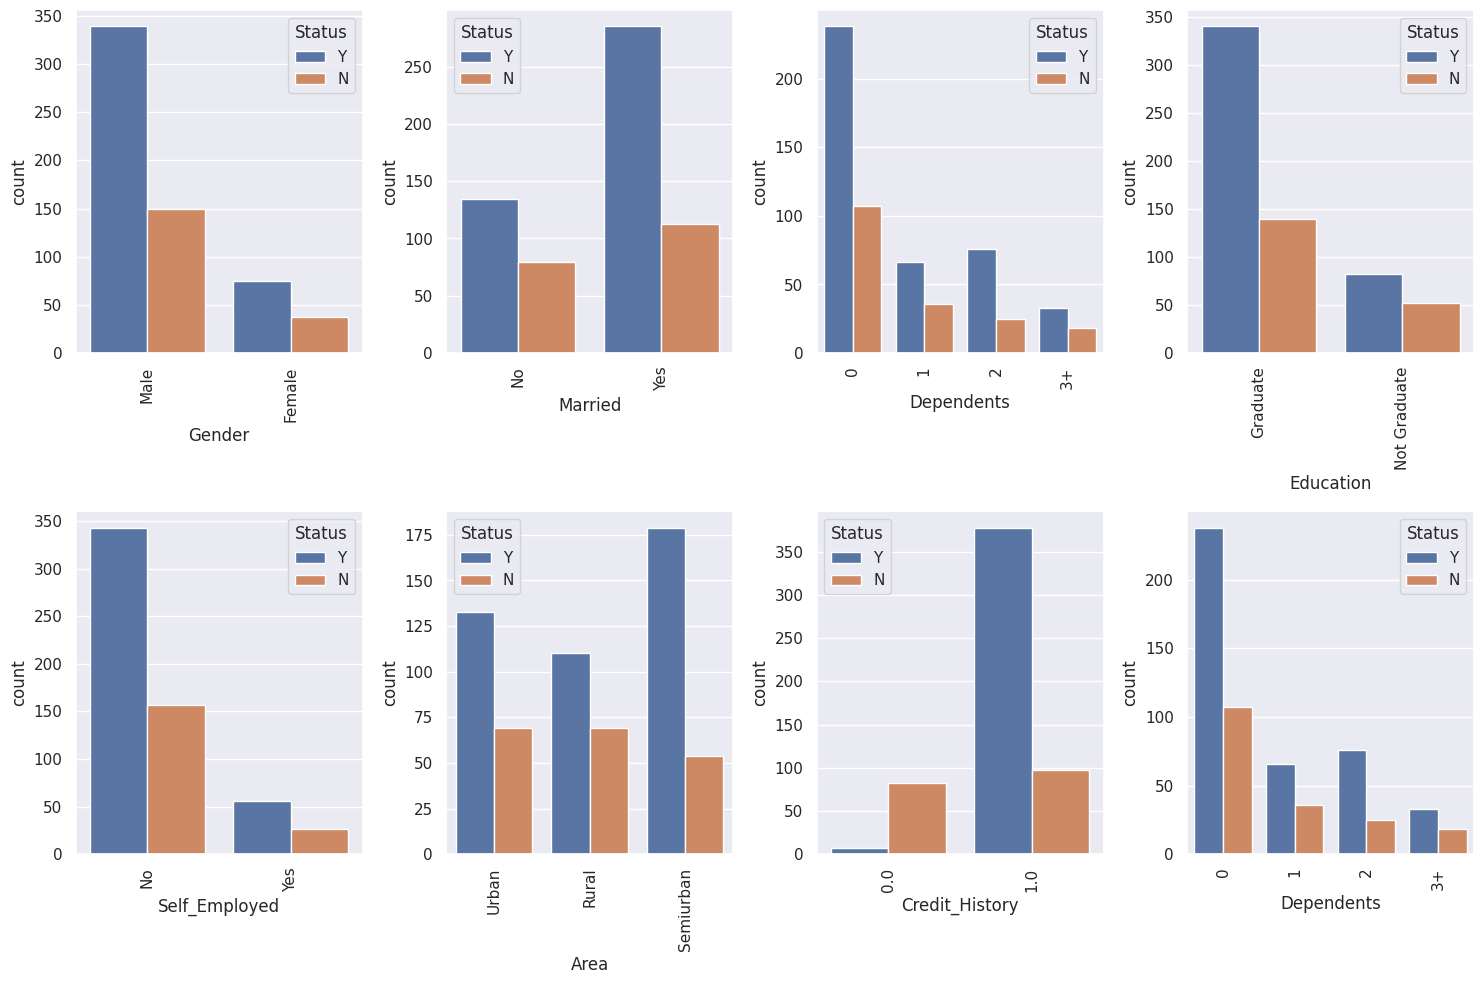

In [ ]:
# list of categorical variables to plot
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Area', 'Credit_History', 'Dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Status', data=dataset, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

combien de ligne et combien de colonnes

In [ ]:
dataset.shape

(614, 12)

cette commande indique combien y'a t il de valeurs nul dans chaque colonne

In [ ]:
dataset.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

DESCRIPTION statistique

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


donner la description statsitique de chaque valeur numerique ( chaque colonne)

In [ ]:
dataset.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


donner la descrip statistique des valeurs non numerique de type object




In [ ]:
dataset.describe(include=['object'])

,Gender,Married,Dependents,Education,Self_Employed,Area,Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Statistique boxplot

create a boxplot visualization of the 'Loan_Amount' 

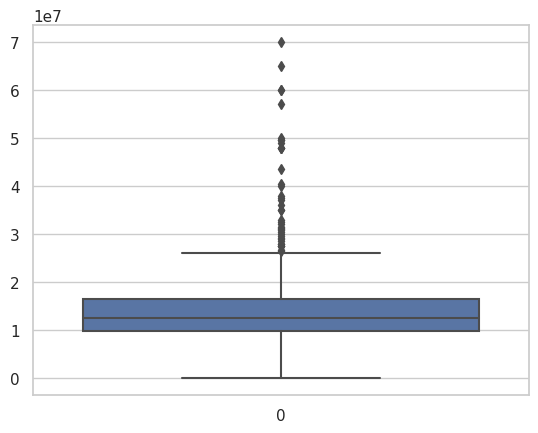

In [ ]:
sns.set(style='whitegrid')
ax = sns.boxplot(data = dataset['Loan_Amount'], orient = 'v')

extraire une liste(tb) de la dataset

In [ ]:
my_list = ['Loan_Amount', 'Applicant_Income']
my_list

['Loan_Amount', 'Applicant_Income']

In [ ]:
dataset[my_list].head()

,Loan_Amount,Applicant_Income
0,15000000,584900
1,12800000,458300
2,6600000,300000
3,12000000,258300
4,14100000,600000


creation d'une visualtion boxplot pour loan amount et applicant income
et h ref à horizontale 

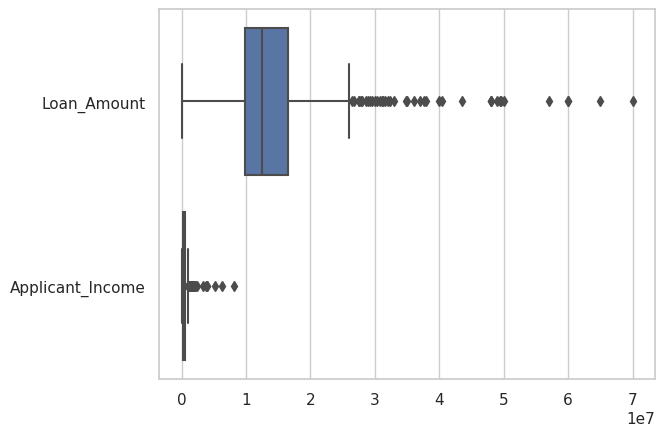

In [ ]:
ax = sns.boxplot(data = dataset[my_list], orient = 'h')

Scatter plot

Text(0, 0.5, 'Loan_Amount')

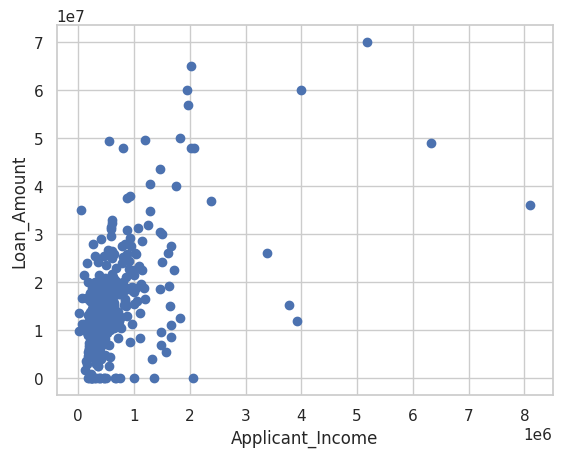

In [ ]:
plt.scatter(x=dataset['Applicant_Income'],y=dataset['Loan_Amount'])
plt.xlabel('Applicant_Income')
plt.ylabel('Loan_Amount')

using the seaborn library to create a pairplot of the dataset.
sns.set(style='ticks') sets the style of the plot to 'ticks',
sns.pairplot(dataset) function creates the pairplot of the dataset using the default settings of seaborn.


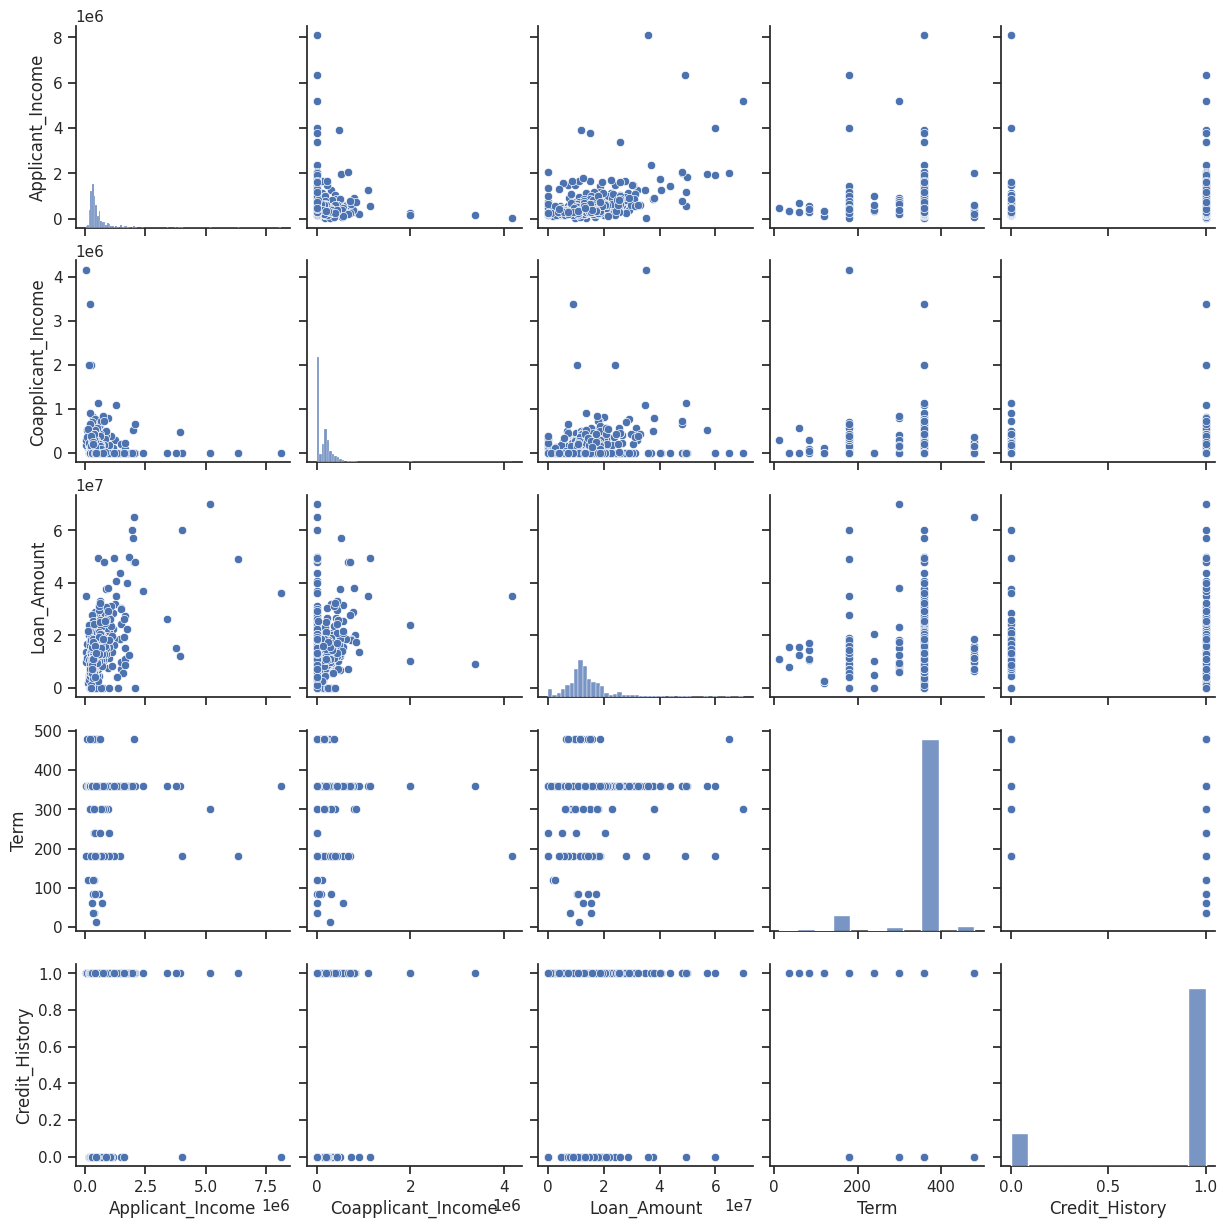

In [ ]:
sns.set(style='ticks')
sns.pairplot(dataset)

In [ ]:
#Check the missing value pourcentage
check_missing = dataset.isnull().sum() * 100 / dataset.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History    8.143322
Self_Employed     5.211726
Dependents        2.442997
Term              2.280130
Gender            2.117264
Married           0.488599
dtype: float64

In [ ]:
dataset.replace('Unknown',np.nan,inplace = True)

In [ ]:
check_missing = dataset.isnull().sum() * 100 / dataset.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History    8.143322
Self_Employed     5.211726
Dependents        2.442997
Term              2.280130
Gender            2.117264
Married           0.488599
dtype: float64

In [ ]:
dataset.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in dataset.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {dataset[col].unique()}")

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Area: ['Urban' 'Rural' 'Semiurban']
Status: ['Y' 'N']


In [ ]:
dataset[['Term', 'Credit_History']] = dataset[['Term', 'Credit_History']].astype(float)

In [ ]:
dataset.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

## filling missing values

In [ ]:
num_features = list(dataset.select_dtypes(include=[np.number]).columns)

In [ ]:
num_features

['Applicant_Income',
 'Coapplicant_Income',
 'Loan_Amount',
 'Term',
 'Credit_History']

In [ ]:
cat_feature = [ i for i in list(dataset.columns) if i not in num_features ]

In [ ]:
cat_feature

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Area',
 'Status']

## Filling numerical features by the mean

In [ ]:
for i in num_features :
  dataset[i].fillna(dataset[i].mean(),inplace = True)

## Filling categorical features by the most frequent 

In [ ]:
dataset = dataset.fillna(dataset.mode().iloc[0])

In [ ]:
dataset.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

# Label Encoding for Object datatype

In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in dataset.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(dataset[col].unique())
    
    # Transform the column using the encoder
    dataset[col] = label_encoder.transform(dataset[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {dataset[col].unique()}")

Gender: [1 0]
Married: [0 1]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Area: [2 0 1]
Status: [1 0]


# Check if the Label 'Status' is balanced or not

<Axes: xlabel='Status', ylabel='count'>

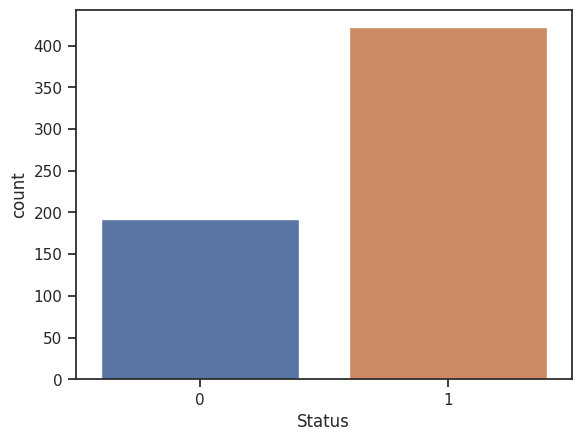

In [ ]:
sns.countplot(x=dataset["Status"])

# Oversampling Minority Class to balance the Label

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
dataset_majority = dataset[(dataset['Status']==1)] 
dataset_minority = dataset[(dataset['Status']==0)] 
# upsample minority class
dataset_minority_upsampled = resample(dataset_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 422, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
dataset_upsampled = pd.concat([dataset_minority_upsampled, dataset_majority])

<Axes: xlabel='Status', ylabel='count'>

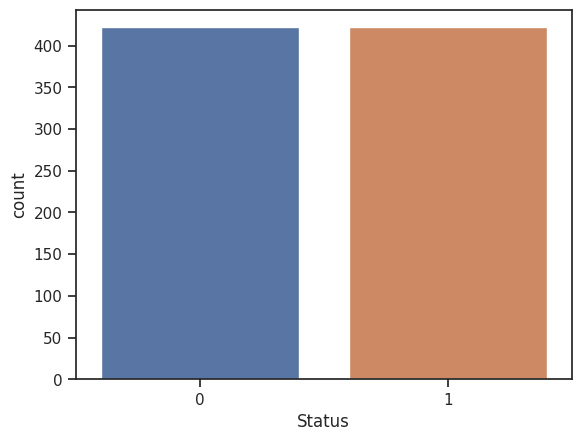

In [ ]:
sns.countplot(x=dataset_upsampled["Status"])

corolation features

<Axes: >

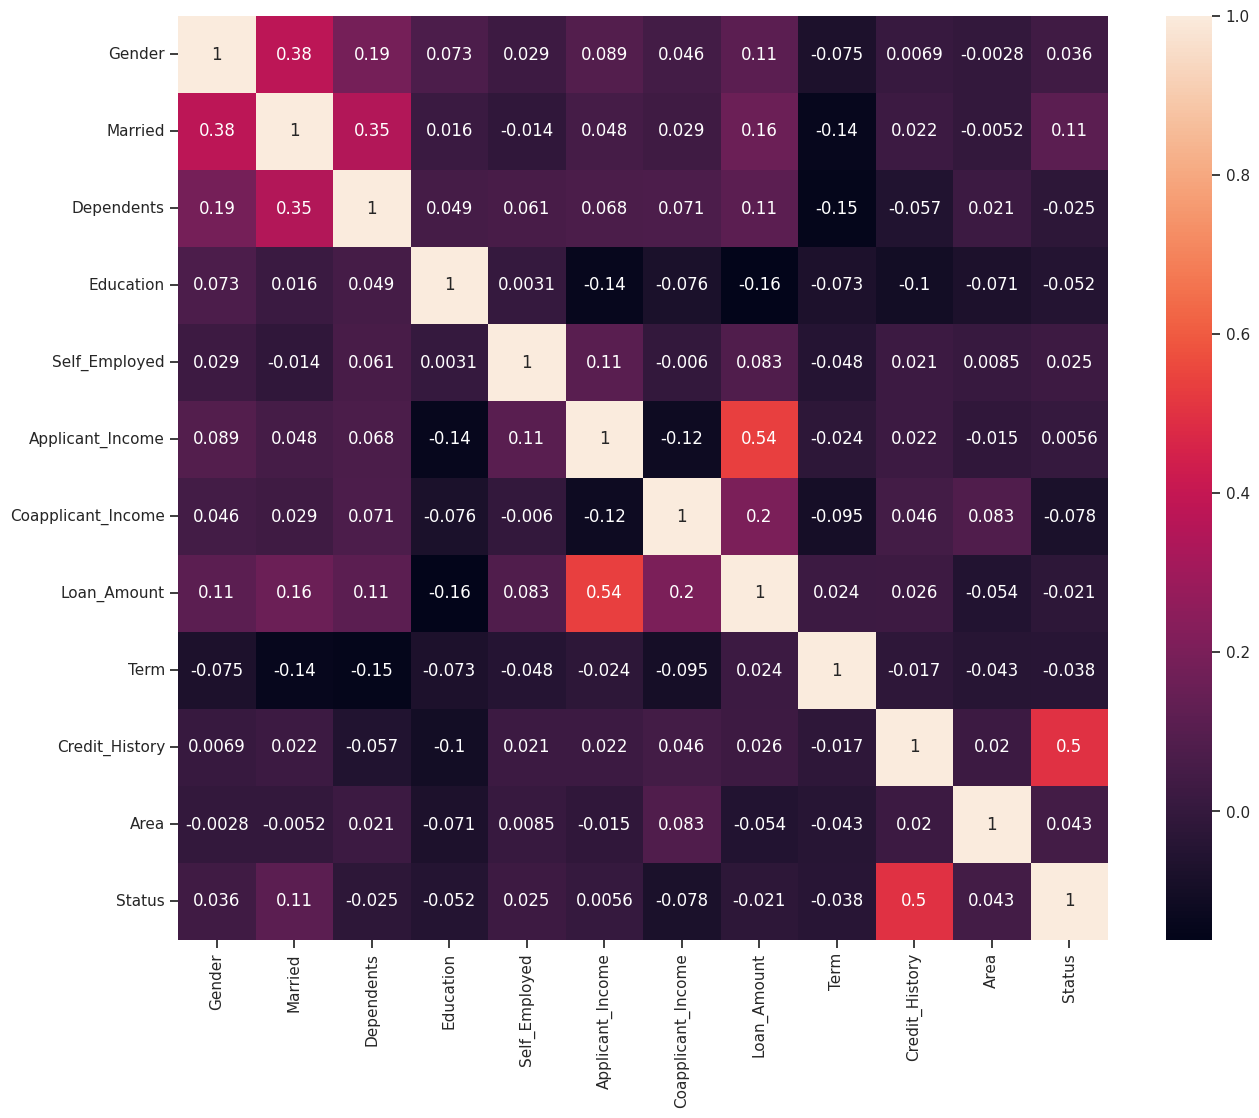

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset_upsampled.corr(), fmt='.2g', annot=True)

# Train Test Split

In [ ]:
X = dataset_upsampled.drop('Status', axis=1)
y = dataset_upsampled['Status']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Modeling 

## 1 - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=2, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, random_state=0)

In [ ]:
y_pred_dt = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred_dt)*100 ,2), "%")

Accuracy Score : 73.37 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred_dt, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_dt, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_dt, average='micro')))

F-1 Score :  0.7337278106508875
Precision Score :  0.7337278106508875
Recall Score :  0.7337278106508875


Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7337278106508875')

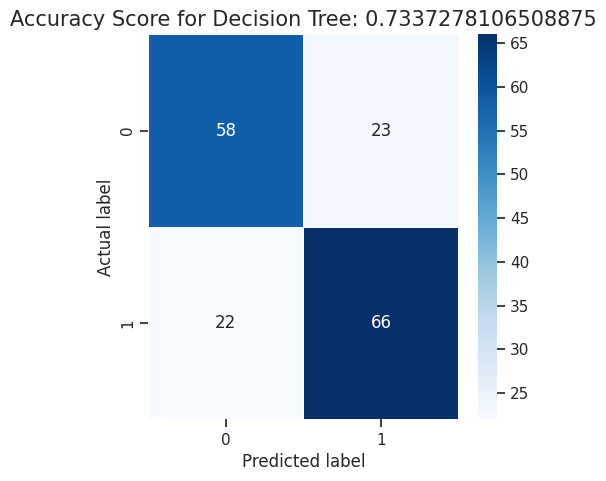

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## 2 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
y_pred_rf = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred_rf)*100 ,2), "%")

Accuracy Score : 87.57 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred_rf, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_rf, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_rf, average='micro')))

F-1 Score :  0.8757396449704142
Precision Score :  0.8757396449704142
Recall Score :  0.8757396449704142


Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8757396449704142')

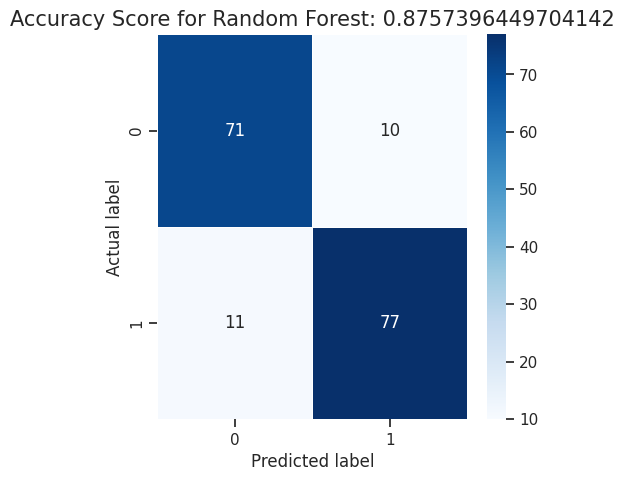

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## 3 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predictLR = LR.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_predictLR)*100 ,2), "%")

Accuracy Score : 42.01 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_predictLR, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_predictLR, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_predictLR, average='micro')))

F-1 Score :  0.42011834319526625
Precision Score :  0.42011834319526625
Recall Score :  0.42011834319526625


Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.42011834319526625')

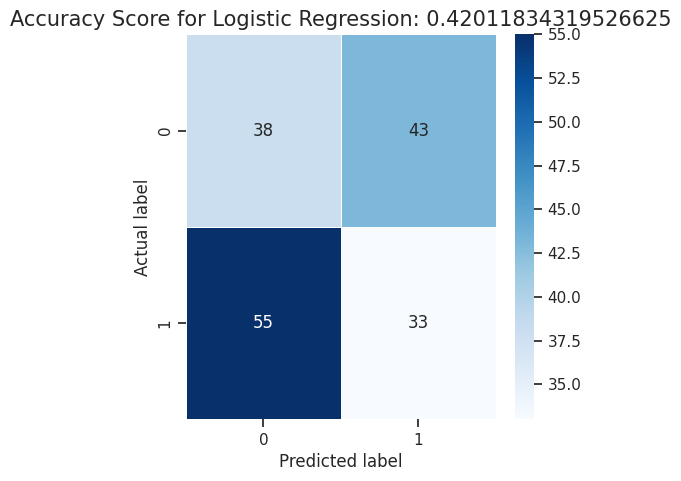

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictLR)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(LR.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## 4 - SVM

In [ ]:
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train,y_train)

"from sklearn.svm import SVC\nlinear_SVM = SVC(kernel='linear')\nlinear_SVM.fit(X_train,y_train)"

In [ ]:
y_predictSVM_l = linear_SVM.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_predictSVM_l)*100 ,2), "%")

'y_predictSVM_l = linear_SVM.predict(X_test)\nprint("Accuracy Score :", round(accuracy_score(y_test, y_predictSVM_l)*100 ,2), "%")'

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_predictSVM_l, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_predictSVM_l, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_predictSVM_l, average='micro')))

"from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score\nprint('F-1 Score : ',(f1_score(y_test, y_predictSVM_l, average='micro')))\nprint('Precision Score : ',(precision_score(y_test, y_predictSVM_l, average='micro')))\nprint('Recall Score : ',(recall_score(y_test, y_predictSVM_l, average='micro')))"

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictSVM_l)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

"from sklearn.metrics import confusion_matrix\ncm = confusion_matrix(y_test, y_predictSVM_l)\nplt.figure(figsize=(5,5))\nsns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')\nplt.ylabel('Actual label')\nplt.xlabel('Predicted label')\nall_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))\nplt.title(all_sample_title, size = 15)"

# Evaluation

| Algorithm       | Accuracy     |Recall | Precision |
| :------------- | -----------|-----------|-----------:|
| Decision Tree   | 0.73  | 0.73 | 0.73 |
| Random Forest | 0.88 | 0.88 | 0.88 |
| linear SVM   | 0.797  | 0.000 | 0.000 |
| Logistic Regression | 0.42 | 0.237 | 0.582 |

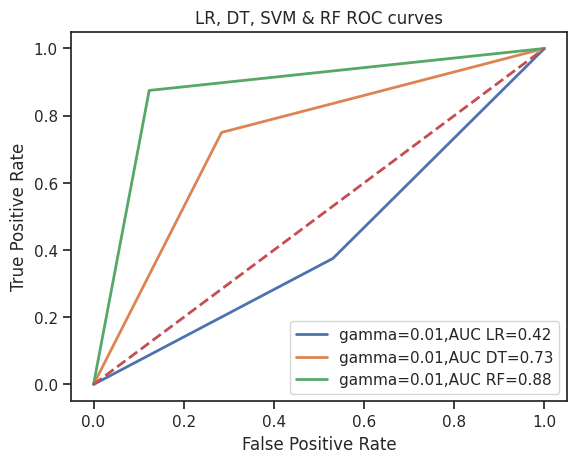

In [ ]:
from sklearn import metrics
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_predictLR)
fpr3,tpr3,thr3 = metrics.roc_curve(y_test,y_pred_dt)
#fpr4,tpr4,thr4 = metrics.roc_curve(y_test,y_predictSVM_l)
fpr6,tpr6,thr6 = metrics.roc_curve(y_test,y_pred_rf)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
#auc4 = metrics.auc(fpr4,tpr4)
auc6 = metrics.auc(fpr6,tpr6)
plt.plot(fpr2,tpr2,'-',lw=2,label='gamma=0.01,AUC LR=%.2f'%auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='gamma=0.01,AUC DT=%.2f'%auc3)
#plt.plot(fpr4,tpr4,'-',lw=2,label='gamma=0.01,AUC SVM_l=%.2f'%auc4)
plt.plot(fpr6,tpr6,'-',lw=2,label='gamma=0.01,AUC RF=%.2f'%auc6)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR, DT, SVM & RF ROC curves')
plt.legend(loc='lower right')
plt.show()

# Clustring 

## 1 - K Means

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

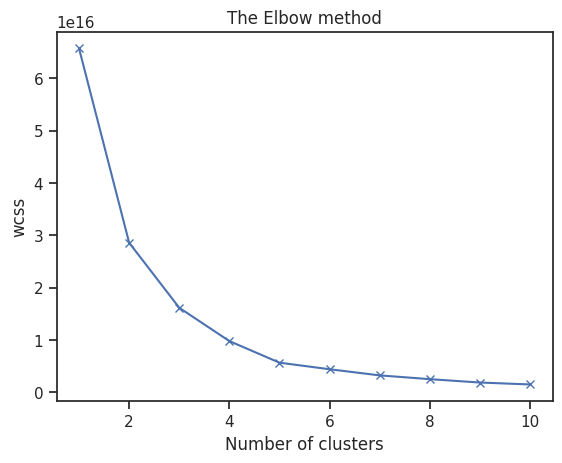

In [ ]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, 'bx-')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
pip install kneed


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator
k = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
k.elbow 

3

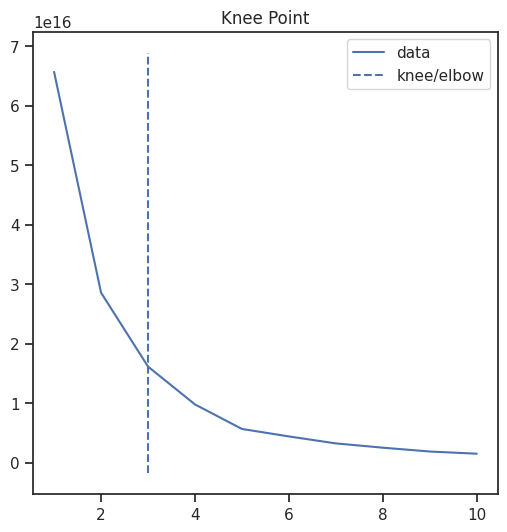

In [ ]:
from kneed import KneeLocator
k = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
k.elbow 
k.plot_knee()
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)

pca.fit(X)

X_pca = pca.transform(X)




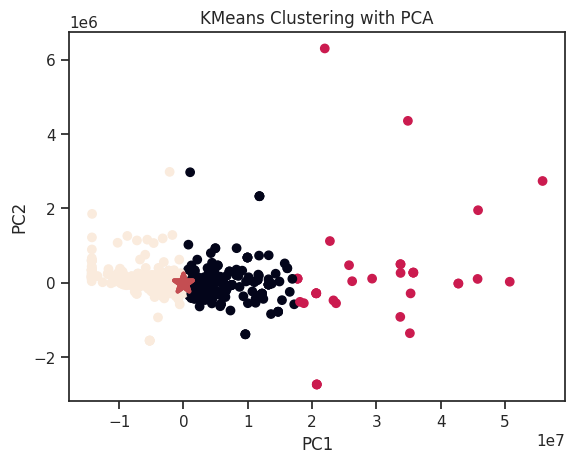

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, linewidths=3, color='r')
plt.title('KMeans Clustering with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 2 - Agglomerative Hierarchical Clustering

Text(0, 0.5, 'Euclidean Distance')

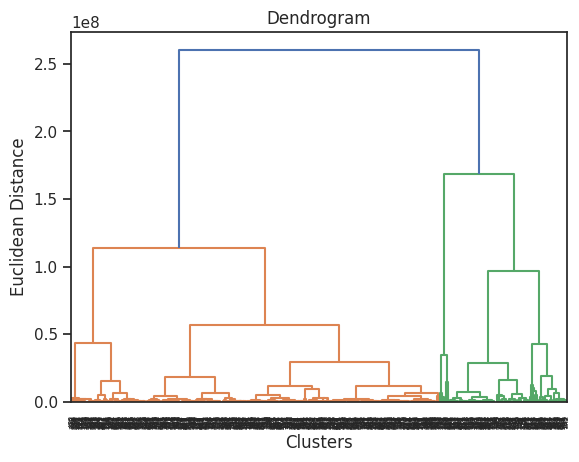

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
hc.fit(X)
y_hc = hc.labels_

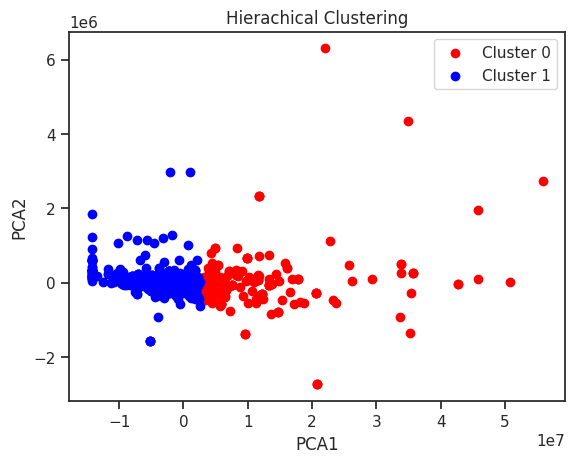

In [ ]:
plt.scatter(X_pca[y_hc==0,0],X_pca[y_hc==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_hc==1,0],X_pca[y_hc==1,1],c='blue',label='Cluster 1')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Hierachical Clustering')
plt.legend()
plt.show()

## Silhouette score


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
cluster_range = range(2,11)
random_range = range(0,10)

silhouette=[]       

for i in cluster_range:
    for j in random_range:
        cluster=KMeans(n_clusters=i, random_state=j)
        cluster.fit(X)
        cluster_labels= cluster.labels_
        silhouette_avg= silhouette_score(X,cluster_labels)
        print("For n_clusters=",i,"and seed=",j, "silhouette avg:", silhouette_avg )
        silhouette.append([i,j,silhouette_avg])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 2 and seed= 0 silhouette avg: 0.6924047814693459
For n_clusters= 2 and seed= 1 silhouette avg: 0.6924047814693459
For n_clusters= 2 and seed= 2 silhouette avg: 0.6924047814693459


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 2 and seed= 3 silhouette avg: 0.6924047814693459
For n_clusters= 2 and seed= 4 silhouette avg: 0.6924047814693459
For n_clusters= 2 and seed= 5 silhouette avg: 0.6924047814693459


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 2 and seed= 6 silhouette avg: 0.6924047814693459
For n_clusters= 2 and seed= 7 silhouette avg: 0.6924047814693459
For n_clusters= 2 and seed= 8 silhouette avg: 0.6924047814693459


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 2 and seed= 9 silhouette avg: 0.6924047814693459


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 3 and seed= 0 silhouette avg: 0.542490139554847
For n_clusters= 3 and seed= 1 silhouette avg: 0.5444538165408854


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 3 and seed= 2 silhouette avg: 0.5444538165408854
For n_clusters= 3 and seed= 3 silhouette avg: 0.5444538165408854


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 3 and seed= 4 silhouette avg: 0.5444538165408854
For n_clusters= 3 and seed= 5 silhouette avg: 0.5444538165408854


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 3 and seed= 6 silhouette avg: 0.5444538165408854
For n_clusters= 3 and seed= 7 silhouette avg: 0.542490139554847


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 3 and seed= 8 silhouette avg: 0.5444538165408854
For n_clusters= 3 and seed= 9 silhouette avg: 0.5444538165408854


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 4 and seed= 0 silhouette avg: 0.4930899758078485
For n_clusters= 4 and seed= 1 silhouette avg: 0.509386647465689


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 4 and seed= 2 silhouette avg: 0.508001889348204
For n_clusters= 4 and seed= 3 silhouette avg: 0.4992663863806342


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 4 and seed= 4 silhouette avg: 0.5240634878430918
For n_clusters= 4 and seed= 5 silhouette avg: 0.4930899758078485


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 4 and seed= 6 silhouette avg: 0.4975130849611723


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 4 and seed= 7 silhouette avg: 0.4992663863806342
For n_clusters= 4 and seed= 8 silhouette avg: 0.49194720505694284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 4 and seed= 9 silhouette avg: 0.4930899758078485


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 5 and seed= 0 silhouette avg: 0.5616712410732525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 5 and seed= 1 silhouette avg: 0.5616712410732525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 5 and seed= 2 silhouette avg: 0.5616712410732525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 5 and seed= 3 silhouette avg: 0.5616712410732525
For n_clusters= 5 and seed= 4 silhouette avg: 0.5616712410732525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 5 and seed= 5 silhouette avg: 0.5616712410732525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 5 and seed= 6 silhouette avg: 0.5616712410732525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 5 and seed= 7 silhouette avg: 0.5616712410732525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 5 and seed= 8 silhouette avg: 0.5616712410732525
For n_clusters= 5 and seed= 9 silhouette avg: 0.5616380293227319


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 6 and seed= 0 silhouette avg: 0.5278384089544781
For n_clusters= 6 and seed= 1 silhouette avg: 0.5447242985126559


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 6 and seed= 2 silhouette avg: 0.5181324420184903
For n_clusters= 6 and seed= 3 silhouette avg: 0.5196681112071632


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 6 and seed= 4 silhouette avg: 0.5213362519051065
For n_clusters= 6 and seed= 5 silhouette avg: 0.5315738882464389


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 6 and seed= 6 silhouette avg: 0.5213362519051065
For n_clusters= 6 and seed= 7 silhouette avg: 0.545905663183284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 6 and seed= 8 silhouette avg: 0.5181324420184903
For n_clusters= 6 and seed= 9 silhouette avg: 0.5213362519051065


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 7 and seed= 0 silhouette avg: 0.5547898005058702


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 7 and seed= 1 silhouette avg: 0.5457252317178357
For n_clusters= 7 and seed= 2 silhouette avg: 0.5369592199189818


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 7 and seed= 3 silhouette avg: 0.5469199021080536


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 7 and seed= 4 silhouette avg: 0.5381988454680898


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 7 and seed= 5 silhouette avg: 0.5467678904693118


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 7 and seed= 6 silhouette avg: 0.5469199021080536


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 7 and seed= 7 silhouette avg: 0.5467678904693118


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 7 and seed= 8 silhouette avg: 0.538108173352824
For n_clusters= 7 and seed= 9 silhouette avg: 0.5467678904693118


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 8 and seed= 0 silhouette avg: 0.53727532623572


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 8 and seed= 1 silhouette avg: 0.5353914859947801


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 8 and seed= 2 silhouette avg: 0.53727532623572


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 8 and seed= 3 silhouette avg: 0.5371337561642774


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 8 and seed= 4 silhouette avg: 0.5326865433347451
For n_clusters= 8 and seed= 5 silhouette avg: 0.5371539289614021


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 8 and seed= 6 silhouette avg: 0.5330286403098446
For n_clusters= 8 and seed= 7 silhouette avg: 0.5326641219161327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 8 and seed= 8 silhouette avg: 0.5330286403098446


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 8 and seed= 9 silhouette avg: 0.5326641219161327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 9 and seed= 0 silhouette avg: 0.5391109040564771


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 9 and seed= 1 silhouette avg: 0.5392323013307951


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 9 and seed= 2 silhouette avg: 0.5389966451489369


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 9 and seed= 3 silhouette avg: 0.5392323013307951


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 9 and seed= 4 silhouette avg: 0.5391172954003706


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 9 and seed= 5 silhouette avg: 0.5389966451489369


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 9 and seed= 6 silhouette avg: 0.5389966451489369


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 9 and seed= 7 silhouette avg: 0.5386406346370755


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 9 and seed= 8 silhouette avg: 0.5349927945823968
For n_clusters= 9 and seed= 9 silhouette avg: 0.5391109040564771


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 10 and seed= 0 silhouette avg: 0.5407175190771765
For n_clusters= 10 and seed= 1 silhouette avg: 0.5410189510625741


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 10 and seed= 2 silhouette avg: 0.5407175190771765


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 10 and seed= 3 silhouette avg: 0.5402404504948692


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 10 and seed= 4 silhouette avg: 0.5383776681677394


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 10 and seed= 5 silhouette avg: 0.5404207224424631


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 10 and seed= 6 silhouette avg: 0.5410189510625741


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 10 and seed= 7 silhouette avg: 0.5402696114333918


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 10 and seed= 8 silhouette avg: 0.5404207224424631


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters= 10 and seed= 9 silhouette avg: 0.5408708066299999


In [ ]:
silhouette=pd.DataFrame(silhouette,columns=["n_clusters","seed","silhouette_score"])
silhouette

,n_clusters,seed,silhouette_score
0,2,0,0.692405
1,2,1,0.692405
2,2,2,0.692405
3,2,3,0.692405
4,2,4,0.692405
...,...,...,...
85,10,5,0.540421
86,10,6,0.541019
87,10,7,0.540270
88,10,8,0.540421


In [ ]:
pivot_silhouette=pd.pivot_table(silhouette,index="n_clusters",columns="seed",values="silhouette_score")
pivot_silhouette

seed,0,1,2,3,4,5,6,7,8,9
n_clusters,,,,,,,,,,
2,0.692405,0.692405,0.692405,0.692405,0.692405,0.692405,0.692405,0.692405,0.692405,0.692405
3,0.542490,0.544454,0.544454,0.544454,0.544454,0.544454,0.544454,0.542490,0.544454,0.544454
4,0.493090,0.509387,0.508002,0.499266,0.524063,0.493090,0.497513,0.499266,0.491947,0.493090
5,0.561671,0.561671,0.561671,0.561671,0.561671,0.561671,0.561671,0.561671,0.561671,0.561638
6,0.527838,0.544724,0.518132,0.519668,0.521336,0.531574,0.521336,0.545906,0.518132,0.521336
7,0.554790,0.545725,0.536959,0.546920,0.538199,0.546768,0.546920,0.546768,0.538108,0.546768
8,0.537275,0.535391,0.537275,0.537134,0.532687,0.537154,0.533029,0.532664,0.533029,0.532664
9,0.539111,0.539232,0.538997,0.539232,0.539117,0.538997,0.538997,0.538641,0.534993,0.539111
10,0.540718,0.541019,0.540718,0.540240,0.538378,0.540421,0.541019,0.540270,0.540421,0.540871


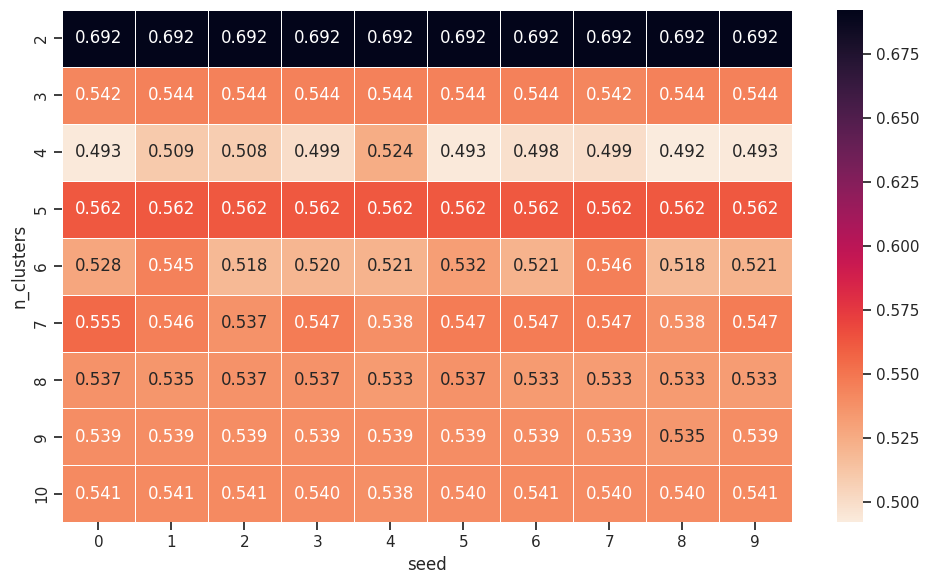

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_silhouette, annot=True, linewidths=.5, fmt='.3f',cmap=sns.cm.rocket_r )
plt.tight_layout()
plt.show()

 # 3 - db scan

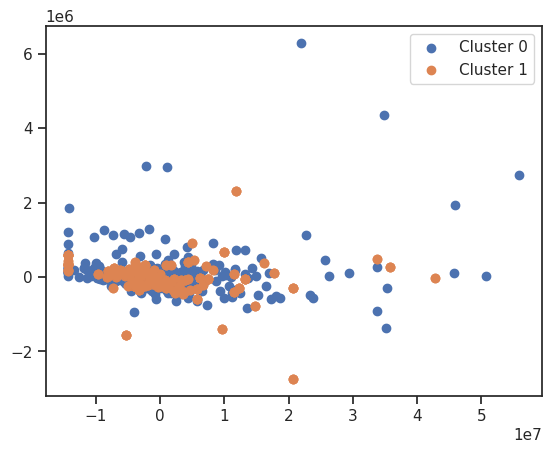

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# Define DBSCAN parameters
eps = 0.5
min_samples = 2

# Initialize DBSCAN object and fit to data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)

# Extract cluster labels and number of clusters
labels = dbscan.labels_
n_clusters = 2
binary_labels = (labels != -1).astype(int)

# Plot clusters
for cluster in range(n_clusters):
    # Get indices of data points in current cluster
    indices = binary_labels == cluster
    
    # Plot data points in current cluster
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f"Cluster {cluster}")
    
# Plot noise points

plt.legend()
plt.show()
